In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mahakkoli/Desktop/Datasets _Python/boston.csv')

In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


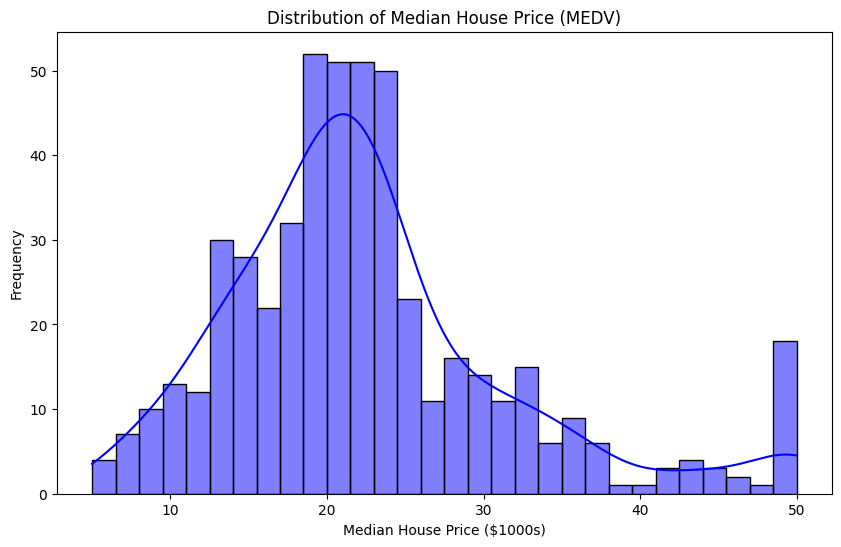

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution of Median House Price (MEDV)')
plt.xlabel('Median House Price ($10000s)')
plt.ylabel('Frequency')
plt.show()

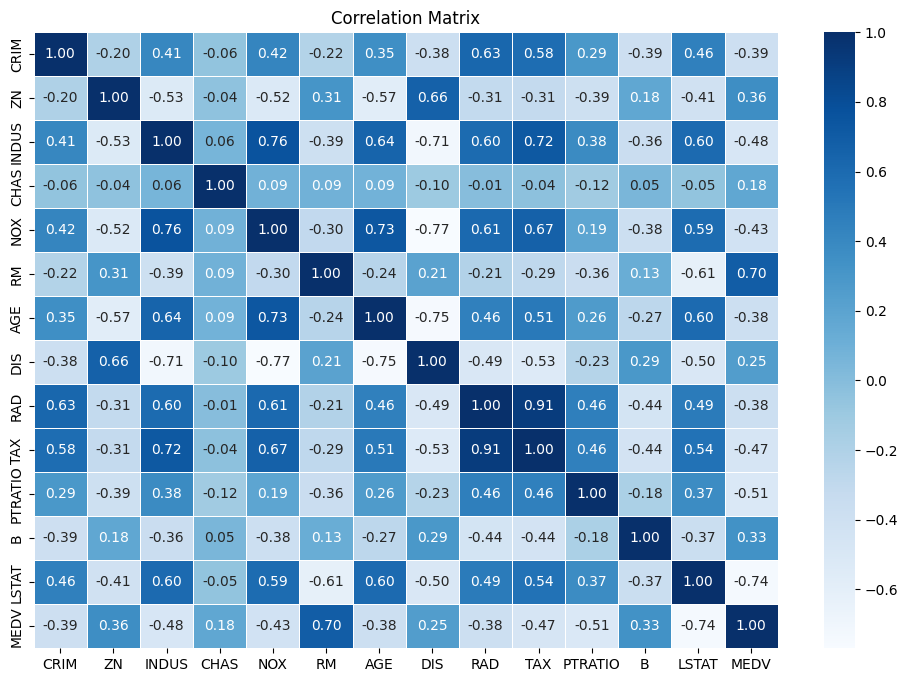

In [19]:
# Visualize correlations between features using a heatmap with custom color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

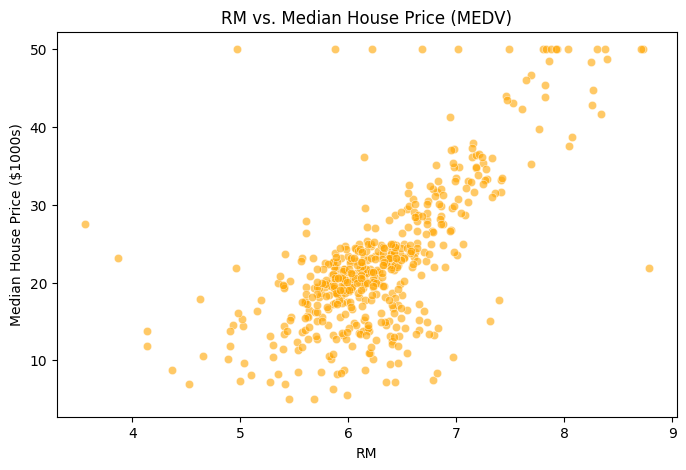

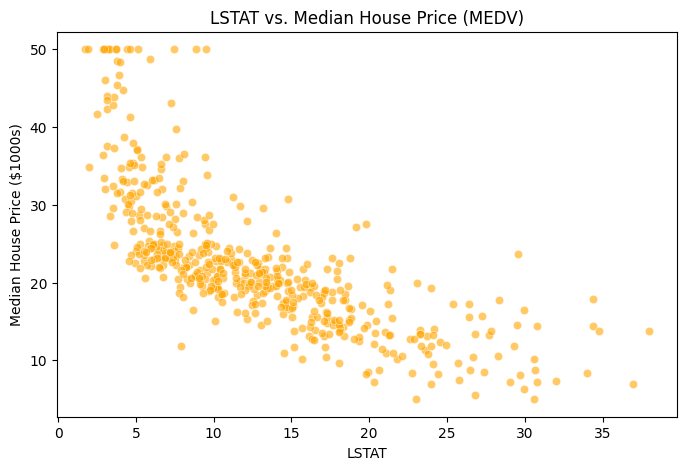

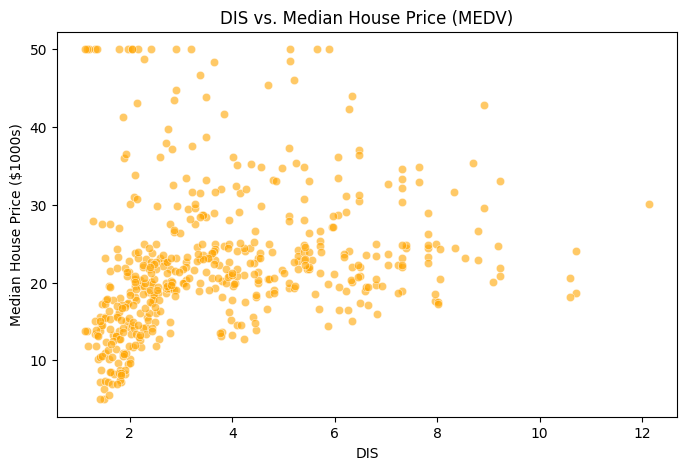

In [47]:
selected_features = ['RM', 'LSTAT', 'DIS']
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['MEDV'], color='orange', alpha=0.6)
    plt.title(f'{feature} vs. Median House Price (MEDV)')
    plt.xlabel(feature)
    plt.ylabel('Median House Price ($1000s)')
    plt.show()

#Median housing prices have a strong positive correlation with RM ie. average number of rooms per dwelling
#Median hosuing prices have a strong negative correlation with LSTAT ie. % lower status of the population
#Median housing prices have a very weak positive correlation with DIS ie. weighted distances to 5 Boston employment centres

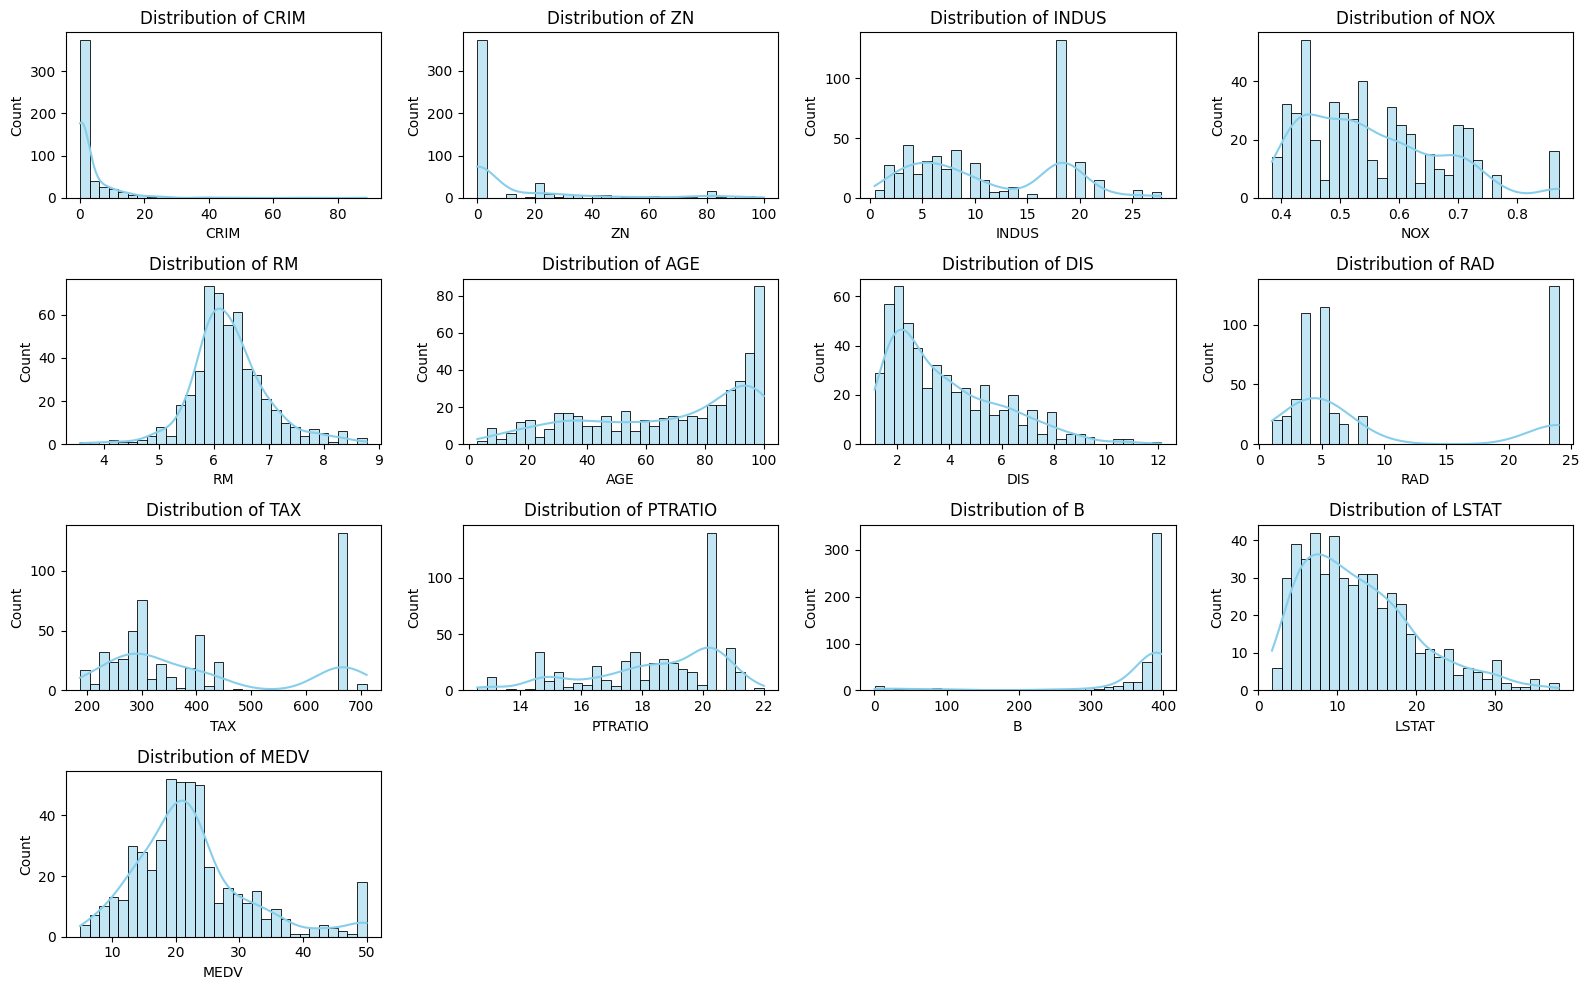

In [31]:
# Distribution of Numerical Features
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#we can see the skewness of all features

/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_4144/1368970495.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


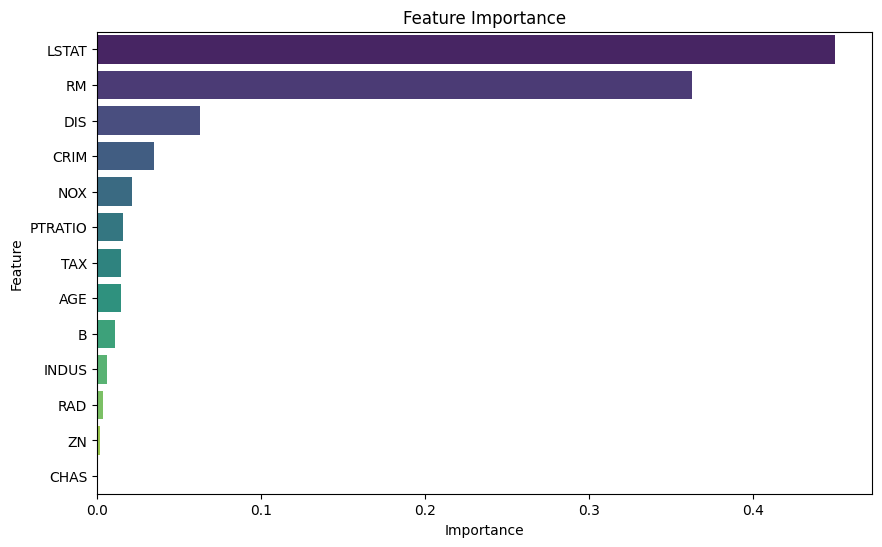

In [30]:
#Feature Importance Analysis (using Random Forest)
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['MEDV'])
y = df['MEDV']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
### Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Preprocessing
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building (using Linear Regression as an example)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93


In [ ]:
## Random Forest and Gradient Boost Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("\nRandom Forest Regression:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print("\nGradient Boosting Regression:")
print(f'Mean Absolute Error (MAE): {mae_gb:.2f}')
print(f'Mean Squared Error (MSE): {mse_gb:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_gb:.2f}')



Random Forest Regression:
Mean Absolute Error (MAE): 2.04
Mean Squared Error (MSE): 7.91
Root Mean Squared Error (RMSE): 2.81

Gradient Boosting Regression:
Mean Absolute Error (MAE): 1.91
Mean Squared Error (MSE): 6.21
Root Mean Squared Error (RMSE): 2.49


#### performing hyperparameter tuning using Grid Search to optimize the Gradient Boosting Regression model's parameters. We select the top features based on their importance and conduct cross-validation to assess the model's performance. Additionally, we detect and remove outliers using Z-score, and retrain the model on the cleaned data, achieving improved RMSE after outlier removal.

In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train_scaled, y_train)

print("Best parameters found by grid search:")
print(gb_grid.best_params_)

# Feature Selection based on Feature Importance
best_gb_model = gb_grid.best_estimator_
feature_importance = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features based on importance
top_features = feature_importance_df['Feature'][:5].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Cross-Validation
cv_scores = cross_val_score(best_gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("\nCross-Validation RMSE Scores:")
print(cv_rmse_scores)

# Outlier Detection and Removal (using Z-score)
z_scores = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()
outliers = z_scores[(z_scores > 3) | (z_scores < -3)].any(axis=1)
cleaned_data = df[~outliers]

print("\nNumber of outliers removed:", sum(outliers))

# Re-train the model on cleaned data
X_cleaned = cleaned_data.drop(columns=['MEDV'])
y_cleaned = cleaned_data['MEDV']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
gb_grid.fit(X_train_cleaned, y_train_cleaned)
y_pred_cleaned = gb_grid.predict(X_test_cleaned)
cleaned_rmse = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
print("\nRMSE after outlier removal:", cleaned_rmse)


Best parameters found by grid search:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

Cross-Validation RMSE Scores:
[3.1585285  4.4144777  3.52510781 3.21947226 3.41228076]

Number of outliers removed: 58


/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_4144/1369939022.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_features = feature_importance_df['Feature'][:5].values



RMSE after outlier removal: 2.157243106440085


#### The Gradient Boost's of approximately 2.15 indicates that, 
#### on average, the GB model's predictions deviate from the actual median house prices 
#### by around USD 2.15.

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter Tuning with Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters found by grid search for Random Forest:")
print(rf_grid.best_params_)

# Feature Selection based on Feature Importance
best_rf_model = rf_grid.best_estimator_
feature_importance_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Select top features based on importance
top_features_rf = feature_importance_df_rf['Feature'][:5].values
X_train_top_rf = X_train[top_features_rf]
X_test_top_rf = X_test[top_features_rf]

Best parameters found by grid search for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_4144/3232902242.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_features_rf = feature_importance_df_rf['Feature'][:5].values


In [50]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regression model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Calculate RMSE on the test data
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
print("RMSE on test data (Random Forest):", test_rmse_rf)


RMSE on test data (Random Forest): 2.8129602438238144


#### The RMSE of Random Forest approximately 2.81 indicates that, 
#### on average, the Random Forest model's predictions deviate from the actual median house prices by around ### USD 2.81.

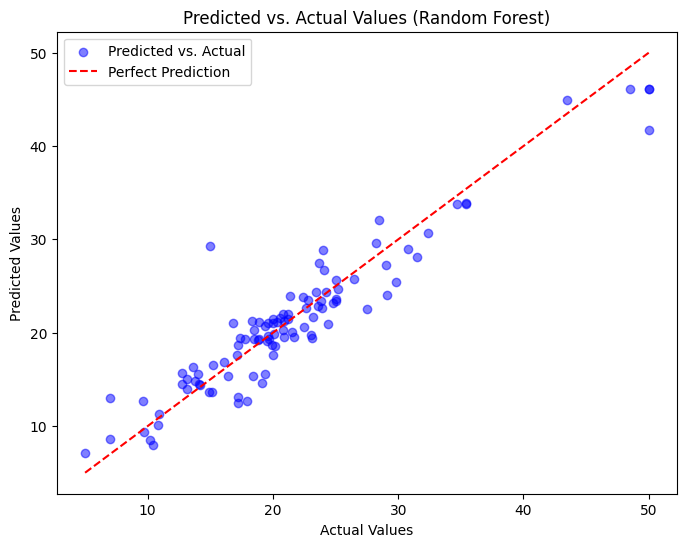

In [51]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_rf, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs. Actual Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


#### the RMSE after outlier removal for the Gradient Boosting (GB) model is lower than that for the Random Forest (RF) model where outliers are not removed but outliers are important so Random Forest is a better performer.

